<a href="https://colab.research.google.com/github/devrishisharma/INTERNSHIP-PROJECTS-/blob/main/BANK%20CUSTOMER%20CHURN%20MODEL%20USING%20PYTHON%20_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

BANK CUSTOMER CHURN MODEL

LEARNING OBJECTIVE

1 DATA ENCODING
2 FEATURE SCALING
3 HANDLING IMBALANCE DATA
   a RANDOM UNDER SAMPLING
   b RANDOM OVER SAMPLING
4 SUPPORT VECTOR MACHINE CLASSIFIER
5 GRID SEARCH FOR HYPERPARAMETER TUNNING

IMPORT LIBRARY

In [4]:
import pandas as pd

In [5]:
import numpy as np

In [6]:
import matplotlib.pyplot as plt

In [7]:
import seaborn as sns

import data

In [8]:
df = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv')

analyse data

In [9]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


check if customer id is dupliicate or not

In [12]:
df.duplicated('CustomerId').sum()

0

In [14]:
df = df.set_index('CustomerId')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


## **encoding **

In [16]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [18]:
df.replace({'Geography':{'France':2,'Germany':1,'Spain':0}},inplace=True)

In [19]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [20]:
df.replace({'Gender':{'Male':0,'Female':1}},inplace=True)

In [21]:
df['Num Of Products'].value_counts()

Num Of Products
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [22]:
df.replace ({'Num Of Products':{1:0,2:1,3:1,4:1}},inplace=True)

In [23]:
df['Has Credit Card'].value_counts()

Has Credit Card
1    7055
0    2945
Name: count, dtype: int64

In [24]:
df['Is Active Member'].value_counts()

Is Active Member
1    5151
0    4849
Name: count, dtype: int64

In [25]:
df.loc[(df['Balance']==0), 'Churn'].value_counts()

Churn
0    3117
1     500
Name: count, dtype: int64

In [26]:
df['Zero Balance'] = np.where(df['Balance']>0,1,0)

<Axes: >

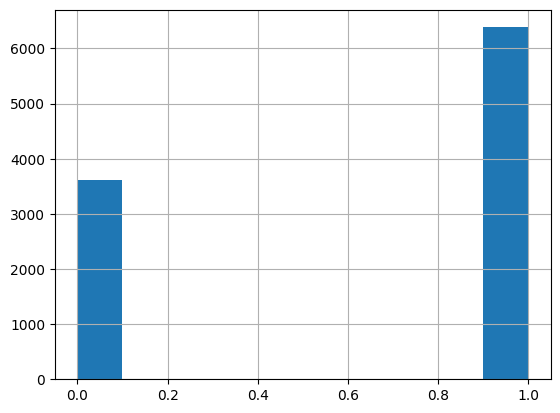

In [30]:
df['Zero Balance'].hist()

In [29]:
df.groupby(['Churn','Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             2064         2064    2064  2064    2064     2064   
      1             1695         1695    1695  1695    1695     1695   
      2             4204         4204    4204  4204    4204     4204   
1     0              413          413     413   413     413      413   
      1              814          814     814   814     814      814   
      2              810          810     810   810     810      810   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     2064             2064              2064   
      1                     1695             1695              1695   
      2                     4204             4204              4204   
1     0                      413              413               413   
      1                      814              814               814   
      2                      810              810               810   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      2064          2064  
      1                      1695          1695  
      2                      4204          4204  
1     0                       413           413  
      1                       814           814  
      2                       810           810

from matplotlib import pyplot as plt
_df_0['Surname'].plot(kind='hist', bins=20, title='Surname')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['CreditScore'].plot(kind='hist', bins=20, title='CreditScore')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Gender'].plot(kind='hist', bins=20, title='Gender')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Surname', y='CreditScore', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='CreditScore', y='Gender', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Gender', y='Age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Age', y='Tenure', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Surname'].plot(kind='line', figsize=(8, 4), title='Surname')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['CreditScore'].plot(kind='line', figsize=(8, 4), title='CreditScore')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Gender'].plot(kind='line', figsize=(8, 4), title='Gender')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

define label and features

In [31]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [32]:
x=df.drop(['Surname','Churn'],axis=1)

In [33]:
y=df['Churn']

In [34]:
x.shape,y.shape

((10000, 11), (10000,))

handling imbalance data

In the context of machine learning, imbalanced data refers to a situation where the distribution of classes in a dataset is not equal. For example, in a binary classification problem (like the churn prediction you are working on), one class might have significantly more samples than the other.

This can cause problems for machine learning algorithms, as they may be biased towards the majority class and perform poorly on the minority class, which is often the class of interest.


To handle imbalanced data, you can use either undersampling or oversampling.

Undersampling: This involves randomly removing samples from the majority class to balance the dataset. This can be done using:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=2529)
x_rus, y_rus = rus.fit_resample(x, y)

Oversampling: This involves randomly duplicating samples from the minority class to balance the dataset. This can be done using:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=2529)
x_ros, y_ros = ros.fit_resample(x, y)

Remember to install imblearn library (version 0.9.1) first.


!pip install imblearn==0.9.1
After applying either of these methods, the resulting datasets x_rus, y_rus or x_ros, y_ros will have a more balanced class distribution, which can improve the performance of machine learning models.


In [35]:
df['Churn'].value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

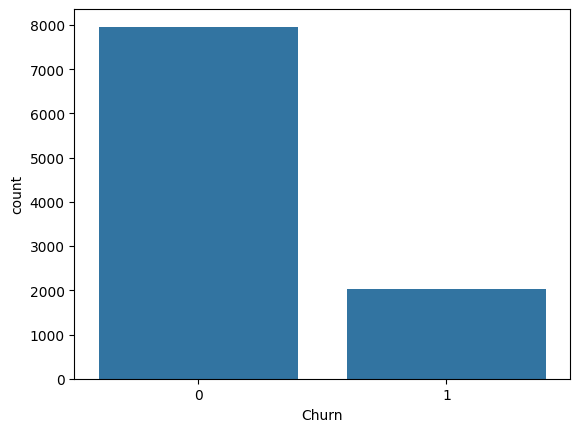

In [36]:
sns.countplot(x='Churn',data=df)

In [37]:
x.shape,y.shape

((10000, 11), (10000,))

random under sampling

In [38]:
from imblearn.under_sampling import RandomUnderSampler

In [39]:
rus= RandomUnderSampler(random_state=2529)

In [40]:
x_rus,y_rus = rus.fit_resample(x,y)

In [41]:
y.value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

In [42]:
y_rus.value_counts()

Churn
0    2037
1    2037
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

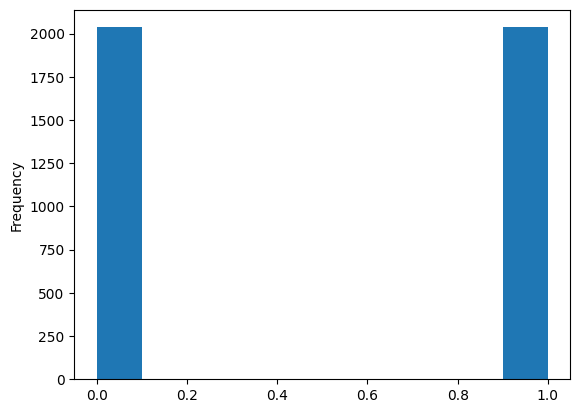

In [43]:
y_rus.plot(kind='hist')

random over sampling

In [45]:
from imblearn.over_sampling import RandomOverSampler

In [46]:
ros= RandomOverSampler(random_state=2529)

In [47]:
x_ros,y_ros = ros.fit_resample(x,y)

In [48]:
x_ros.shape,y_ros.shape, x.shape,y.shape

((15926, 11), (15926,), (10000, 11), (10000,))

In [49]:
y.value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

In [50]:
y_ros.value_counts()

Churn
1    7963
0    7963
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

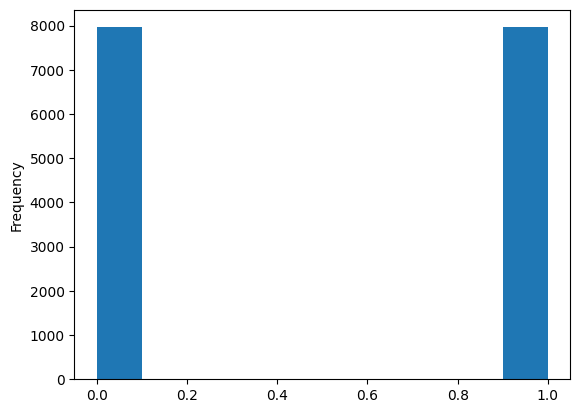

In [51]:
y_ros.plot(kind='hist')

train test split

In [52]:
from sklearn.model_selection import train_test_split

split original data

In [53]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=2529)

split random under sampling

In [54]:
x_train_rus,x_test_rus,y_train_rus,y_test_rus = train_test_split(x_rus,y_rus,test_size=0.3,random_state=2529)

split random over sample data

In [55]:
x_train_ros,x_test_ros,y_train_ros,y_test_ros = train_test_split(x_ros,y_ros,test_size=0.3,random_state=2529)

standardize features

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
sc = StandardScaler()

standardize original data

In [59]:
x_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(x_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [60]:
x_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(x_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

standardize random under samle data

In [62]:
x_train_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(x_train_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [63]:
x_test_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(x_test_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

support vector machine classifier

In [64]:
from sklearn.svm import SVC

In [65]:
svc = SVC()

In [66]:
svc.fit (x_train,y_train)

SVC()

In [68]:
y_pred = svc.predict(x_test)

model accuracy

In [69]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [70]:
confusion_matrix(y_test,y_pred)

array([[2381,   33],
       [ 436,  150]])

In [71]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2414
           1       0.82      0.26      0.39       586

    accuracy                           0.84      3000
   macro avg       0.83      0.62      0.65      3000
weighted avg       0.84      0.84      0.81      3000



hyperparameter tunning

In [72]:
from sklearn.model_selection import GridSearchCV

In [73]:
param_grid = {'C':[0.1,1,10],
              'gamma':[1,0.1,0.01],
              'kernel':['rbf'],
              'class_weight':['balanced']}

In [76]:
grid= GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)
grid.fit(x_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.9s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.0s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.7s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.1s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.0s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [77]:
print(grid.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [78]:
grid_prediction = grid.predict(x_test)

In [79]:
confusion_matrix(y_test,grid_prediction)

array([[2159,  255],
       [ 343,  243]])

In [80]:
print (classification_report(y_test,grid_prediction))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      2414
           1       0.49      0.41      0.45       586

    accuracy                           0.80      3000
   macro avg       0.68      0.65      0.66      3000
weighted avg       0.79      0.80      0.79      3000



model with random under sampling

In [81]:
svc_rus = SVC()

In [82]:
svc_rus.fit(x_train_rus,y_train_rus)

SVC()

In [83]:
y_pred_rus = svc_rus.predict(x_test_rus)

model accuracy

In [84]:
confusion_matrix(y_test_rus,y_pred_rus)

array([[470, 157],
       [174, 422]])

In [85]:
print(classification_report(y_test_rus,y_pred_rus))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       627
           1       0.73      0.71      0.72       596

    accuracy                           0.73      1223
   macro avg       0.73      0.73      0.73      1223
weighted avg       0.73      0.73      0.73      1223



hyperparameter tunning

In [86]:
param_grid = {'C':[0.1,1,10],
              'gamma':[1,0.1,0.01],
              'kernel':['rbf'],
              'class_weight':['balanced']}

In [89]:
grid_rus= GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)
grid_rus.fit(x_train_rus,y_train_rus)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.6s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.8s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.7s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.4s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [90]:
print(grid_rus.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=0.1)


In [91]:
grid_prediction_rus = grid_rus.predict(x_test_rus)

In [92]:
confusion_matrix  (y_test_rus,grid_prediction_rus)

array([[476, 151],
       [172, 424]])

In [93]:
print (classification_report(y_test_rus,grid_prediction_rus))

              precision    recall  f1-score   support

           0       0.73      0.76      0.75       627
           1       0.74      0.71      0.72       596

    accuracy                           0.74      1223
   macro avg       0.74      0.74      0.74      1223
weighted avg       0.74      0.74      0.74      1223



model with random over sampling

In [94]:
svc_ros = SVC()

In [95]:
svc_ros.fit(x_train_ros,y_train_ros)

SVC()

In [96]:
y_pred_ros = svc_ros.predict(x_test_ros)

model accuracy

In [97]:
confusion_matrix(y_test_ros,y_pred_ros)

array([[ 921, 1458],
       [ 592, 1807]])

In [98]:
print(classification_report(y_test_ros,y_pred_ros))

              precision    recall  f1-score   support

           0       0.61      0.39      0.47      2379
           1       0.55      0.75      0.64      2399

    accuracy                           0.57      4778
   macro avg       0.58      0.57      0.56      4778
weighted avg       0.58      0.57      0.56      4778



hyperparameter tunning

In [99]:
param_grid  = {'C':[0.1,1,10],
              'gamma':[1,0.1,0.01],
              'kernel':['rbf'],
              'class_weight':['balanced']}

In [100]:
grid_ros= GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)
grid_ros.fit(x_train_ros,y_train_ros)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   9.4s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   6.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.8s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.8s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   6.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   6.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   8.7s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   9.0s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   7.4s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   6.5s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   9.5s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [101]:
print(grid_ros.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=1)


In [102]:
grid_prediction_ros = grid_ros.predict(x_test_ros)

In [103]:
confusion_matrix  (y_test_ros,grid_prediction_ros)

array([[2379,    0],
       [ 125, 2274]])

In [104]:
print (classification_report(y_test_ros,grid_prediction_ros))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      2379
           1       1.00      0.95      0.97      2399

    accuracy                           0.97      4778
   macro avg       0.98      0.97      0.97      4778
weighted avg       0.98      0.97      0.97      4778



lets compare

In [106]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2414
           1       0.82      0.26      0.39       586

    accuracy                           0.84      3000
   macro avg       0.83      0.62      0.65      3000
weighted avg       0.84      0.84      0.81      3000



In [107]:
print(classification_report(y_test,grid_prediction))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      2414
           1       0.49      0.41      0.45       586

    accuracy                           0.80      3000
   macro avg       0.68      0.65      0.66      3000
weighted avg       0.79      0.80      0.79      3000



In [110]:
print (classification_report(y_test_ros,y_pred_ros))

              precision    recall  f1-score   support

           0       0.61      0.39      0.47      2379
           1       0.55      0.75      0.64      2399

    accuracy                           0.57      4778
   macro avg       0.58      0.57      0.56      4778
weighted avg       0.58      0.57      0.56      4778



In [111]:
print (classification_report(y_test_ros,grid_prediction_ros))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      2379
           1       1.00      0.95      0.97      2399

    accuracy                           0.97      4778
   macro avg       0.98      0.97      0.97      4778
weighted avg       0.98      0.97      0.97      4778

